## Load Libraries

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy
from IPython.core.pylabtools import figsize
from statistical_methods import Statistics
from scipy.stats import ttest_ind

In [2]:
x = pd.read_csv('student-mat.csv')
df = x.copy()

### Do Romantic Relationships Have an Effect on Grades?

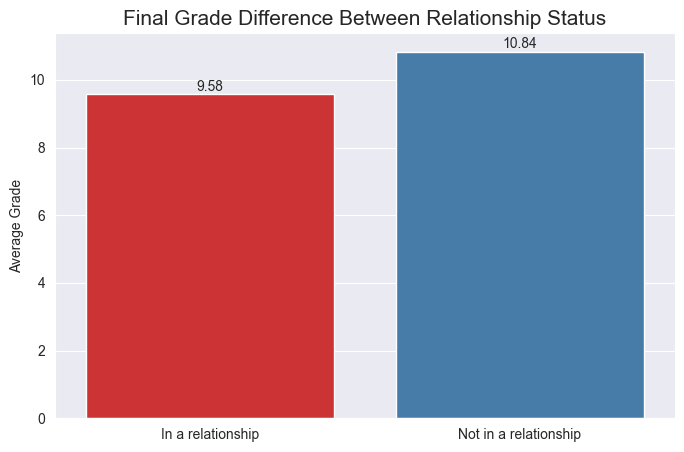

On average, students who are not in a relationship have a final grade higher by 12.35%
T-Statistics:-2.512, P-Value:0.013
The test is statistically significant!


In [3]:
x = df.copy()

y = x.groupby('romantic')['G3'].mean()

no = y['no']
yes = y['yes']

categories = ['In a relationship', 'Not in a relationship']
values = [yes, no]

plt.figure(figsize=(8,5))
sns.barplot(x=categories, y=values, hue=categories, palette='Set1')
plt.title('Final Grade Difference Between Relationship Status', fontsize=15)
plt.ylabel('Average Grade')

for i, v in enumerate(values):
    plt.text(i, v+0.1, round(v,2), ha='center')

plt.show()

in_rs = df[df['romantic'] == 'yes']['G3']
not_rs = df[df['romantic'] == 'no']['G3']

t_stat, p_value = ttest_ind(in_rs, not_rs, equal_var=False)

pct_diff = Statistics.percentage_difference(no,yes)
print(f'On average, students who are not in a relationship have a final grade higher by {pct_diff}')
print(f"T-Statistics:{round(t_stat, 3)}, P-Value:{round(p_value, 3)}")

if p_value < 0.05:
    print('The test is statistically significant!')
else:
    print('The test is NOT statistically significant.')

### Urban vs Rural

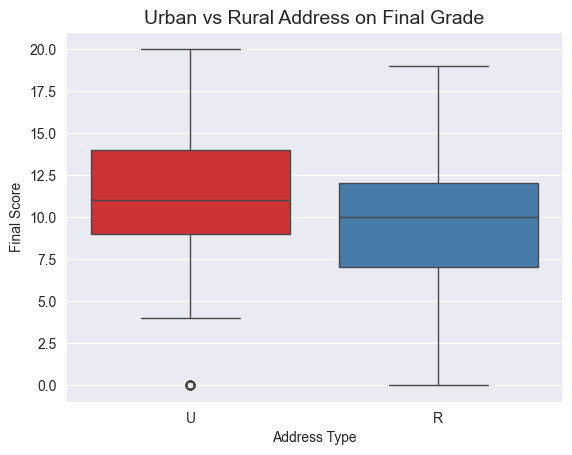

  Address  Average Final Grade
0   Rural                 9.51
1   Urban                10.67
On average, students who live in urban areas score higher than those in rural by 11.5%
T-Statistics:-2.11, P-Value:0.037
The test is statistically significant!


In [4]:
sns.boxplot(x=df['address'], y=df['G3'], hue=df['address'], palette='Set1')
plt.title('Urban vs Rural Address on Final Grade', fontsize=14)
plt.xlabel('Address Type')
plt.ylabel('Final Score')
plt.show()

rural_group = df[df['address'] == 'R']['G3']
urban_group = df[df['address'] == 'U']['G3']

t_stat, p_value = ttest_ind(rural_group, urban_group, equal_var=False)

data = df.groupby('address')['G3'].mean().round(2).reset_index()
data.columns = ['Address', 'Average Final Grade']

def add_change(x):
    if x == 'R':
        return 'Rural'
    else:
        return 'Urban'
    
data['Address'] = data['Address'].apply(add_change)

rural_score = data.iloc[0,1]
urban_score = data.iloc[1,1]

print(data)
print(f"On average, students who live in urban areas score higher than those in rural by {Statistics.percentage_difference(rural_score, urban_score)}")

print(f"T-Statistics:{round(t_stat, 3)}, P-Value:{round(p_value, 3)}")
if p_value < 0.05:
    print('The test is statistically significant!')
else:
    print('The test is NOT statistically significant.')

### Internet Access 

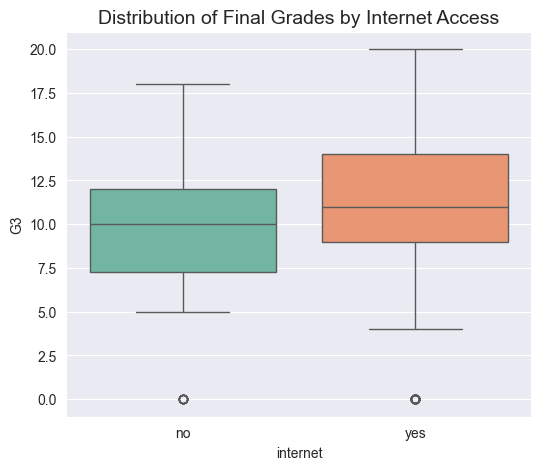

Students who have access to internet score higher on average to those who dont by 12.06%
T-Statistics:-1.989, P-Value:0.0496
The difference is statistically significant!


In [5]:
group_no = df[df['internet'] == 'no']['G3']
group_yes = df[df['internet'] == 'yes']['G3']

t_stat, p_value = ttest_ind(group_no, group_yes, equal_var=False)

plt.figure(figsize=(6,5))
sns.boxplot(x=df['internet'], y=df['G3'],hue=df['internet'], palette='Set2')
plt.title("Distribution of Final Grades by Internet Access", fontsize=14)
plt.show()

data = df.groupby('internet')['G3'].mean()

no_int = data['no']
yes_int = data['yes']

print(f"Students who have access to internet score higher on average to those who dont by {Statistics.percentage_difference(no_int, yes_int)}")

print(f'T-Statistics:{round(t_stat, 3)}, P-Value:{round(p_value, 4)}')

if p_value < 0.05:
    print('The difference is statistically significant!')
else:
    print('The difference is NOT statistically significant.')


### Does Going Out Hurt Performance? 

In [6]:
x = df.copy()

corr = x[['goout', 'G3']].corr(method='pearson')

y = corr['goout']

result = y['G3']

print(Statistics.pearson_correlation_explain(result))


The pearson correlation coefficient is: -0.133
Weak negative correlation: A slight tendency for one variable to decrease when the other increases.


### Does Family Relationships Affect Grades?

In [7]:
corr = df[['famrel','G3']].corr()

z = corr['famrel']

result = z['G3']

print(Statistics.pearson_correlation_explain(result))

The pearson correlation coefficient is: 0.051
Very weak or no correlation: The variables do not have a meaningful linear relationship.


#### End of analysis. 